# SVC (당뇨병 데이터셋)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 준비

In [ ]:
# !wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/diabetes.csv

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. 정보 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## 범주형 변수

In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


### 숫자형 변수

In [ ]:
df['Pregnancies'].value_counts()

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [ ]:
df['Pregnancies'].value_counts().sort_index()

,count
Pregnancies,
0,111
1,135
2,103
3,75
4,68
5,57
6,50
7,45
8,38


## 3. 결측값

In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## 4. 이상치

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df_tmp = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] # Changed tuple to list
df_tmp.columns
for i, col in enumerate(df_tmp.columns):
    print(col, len (df[df[col]==0]))

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


## 5. 데이터 분리

In [ ]:
x = df.drop('Outcome', axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y = df['Outcome']
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [ ]:
y_train.value_counts()

,count
Outcome,
0,400
1,214


### 이상치 처리

In [ ]:
# for i, col in enumerate(df_tmp.columns):
#   # 0 값을 NaN으로 치환
#   df.replace({col: 0}, np.nan, inplace=True)
#   # NaN 값을 해당 열의 평균값으로 대체
#   df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
df_tmp.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [ ]:
x_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]= x_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.nan)

In [ ]:
x_train.isna().sum()

,0
Pregnancies,0
Glucose,4
BloodPressure,23
SkinThickness,175
Insulin,290
BMI,9
DiabetesPedigreeFunction,0
Age,0


In [ ]:
mean_dict = {}

for col in df_tmp.columns:
  u = x_train[col].mean()
  x_train[col] = x_train[col].fillna(u)
  mean_dict[col] = u

In [ ]:
x_train.isna().sum() # 결측치 없앰

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


In [ ]:
mean_dict

{'Glucose': 121.70163934426229,
 'BloodPressure': 72.14551607445009,
 'SkinThickness': 29.059225512528474,
 'Insulin': 149.07716049382717,
 'BMI': 32.44892561983471}

## 7. 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# 인코딩 필요없음
y_train

,Outcome
353,0
711,0
373,0
46,0
682,0
...,...
451,1
113,0
556,0
667,1


In [ ]:
y_train = y_train.to_numpy()
type(x_train_scaled), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
x_train_scaled.shape, y_train.shape

((614, 8), (614,))

## 8. 학습

### 베이스 모델

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(random_state=42)
clf.fit(x_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## 8. 테스트

In [ ]:
mean_dict

{'Glucose': 121.70163934426229,
 'BloodPressure': 72.14551607445009,
 'SkinThickness': 29.059225512528474,
 'Insulin': 149.07716049382717,
 'BMI': 32.44892561983471}

In [ ]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159,64,0,0,27.4,0.294,40
672,10,68,106,23,49,35.5,0.285,47
700,2,122,76,27,200,35.9,0.483,26
630,7,114,64,0,0,27.4,0.732,34
81,2,74,0,0,0,0.0,0.102,22


In [ ]:
# 이상치 처리
x_test[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = x_test[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)


In [ ]:
for col in df_tmp.columns:
  u = mean_dict[col]
  x_test[col] = x_test[col].fillna(u)

In [ ]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159.0,64.000000,29.558824,185.5,27.400000,0.294,40
672,10,68.0,106.000000,23.000000,49.0,35.500000,0.285,47
700,2,122.0,76.000000,27.000000,200.0,35.900000,0.483,26
630,7,114.0,64.000000,29.558824,185.5,27.400000,0.732,34
81,2,74.0,73.485915,29.558824,185.5,32.491447,0.102,22
...,...,...,...,...,...,...,...,...
32,3,88.0,58.000000,11.000000,54.0,24.800000,0.267,22
637,2,94.0,76.000000,18.000000,66.0,31.600000,0.649,23
593,2,82.0,52.000000,22.000000,115.0,28.500000,1.699,25
425,4,184.0,78.000000,39.000000,277.0,37.000000,0.264,31


### 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_test_s = scaler.fit_transform(x_test)

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
x_test_s.shape, y_test.shape

((154, 8), (154,))

In [ ]:
y_pred = clf.predict(x_test_s)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

## 9. 모델 평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='binary')
  recall = recall_score(y_true, y_pred, average='binary')
  f1 = f1_score(y_true, y_pred, average='binary')

  print(f'acc: {acc:.4f}, prec: {prec:.4f}, recall: {recall:.4f}, f1: {f1:.4f}')

  cm = confusion_matrix(y_true, y_pred) # Assign the result to a variable (e.g., cm)
  s = sns.heatmap(cm, cmap = 'Blues', annot=True, fmt = 'd',cbar=False) # Use the assigned variable
  s.set_xlabel('Predicted')
  s.set_ylabel('Actual')
  plt.show()

In [ ]:
print_metrics(y_test, y_pred)

NameError: name 'print_metrics' is not defined

## 10. 모델 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = SVC(random_state=43)
params_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'degree':[2, 3],
    'kernel': ['rbf', 'poly', 'linear']
    }

In [ ]:
gs = GridSearchCV(estimator=clf, param_grid=params_grid, cv=5, n_jobs=-1, verbose=3, refit=True)

In [ ]:
gs.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=SVC(random_state=43), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=3)

In [ ]:
# 베스트 결과가 나오는 파라미터의 조합
gs.best_params_

{'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}

## 11. 모델 저장

In [ ]:
# 사용한 객체를 파일로 저장
import joblib
joblib.dump(gs, 'svc_bin_diabetes.pkl')

['svc_bin_diabetes.pkl']

In [ ]:
clf = joblib.load('svc_bin_diabetes.pkl')
clf

GridSearchCV(cv=5, estimator=SVC(random_state=43), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=3)

In [ ]:
joblib.dump(mean_dict,'svc_bin_diabetes_meandict.pkl')

['svc_bin_diabetes_meandict.pkl']

In [ ]:
joblib.dump(scaler, 'svc_bin_diabetes_scaler.pkl')

['svc_bin_diabetes_scaler.pkl']

## 12. KNN 모델

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print(f'acc: {acc:.4f}, prec: {prec:.4f}, recall: {recall:.4f}, f1: {f1:.4f}')

  cm = confusion_matrix(y_true, y_pred) # Assign the result to a variable (e.g., cm)
  s = sns.heatmap(cm, cmap = 'Blues', annot=True, fmt = 'd',cbar=False) # Use the assigned variable
  s.set_xlabel('Predicted')
  s.set_ylabel('Actual')
  plt.show()

acc: 0.6948, prec: 0.6625, recall: 0.6202, f1: 0.6236


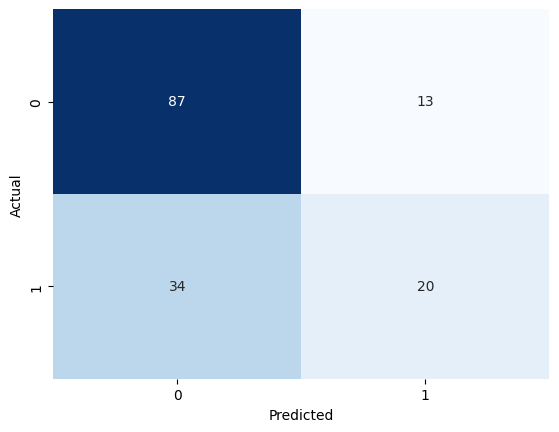

In [ ]:
y_pred = clf.predict(x_test_scaled)
print_metrics(y_test, y_pred)